
# Supervised Learning In-Depth: Random Forests

||continuous|categorical|
|---|---|---|
|**supervised**|**regression**|**classification**|
|unsupervised|dimension reduction|clustering|

Previously we saw, **Decision Trees**. While the algorithm has some good attributes, it suffers from high variance issues.

Lets look at a more powerful algorithms which is based on Decision Trees (but tries to remove the variances) called - **Random Forests**.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# use seaborn plotting defaults
import seaborn as sns; sns.set()

# import warnings
# warnings.filterwarnings('ignore')

## Motivating Random Forests - Ensemble Learning

Random forests are an example of an *ensemble learner* built on decision trees.


- Combining weak classifiers (of the same type)...
    - ... in order to produce a strong classifier
        - Condition: diversity among the weak classifiers


- Example: Boosting
    - Train each new weak classifier focusing on samples misclassified by  previous ones

    - Popular implementation: AdaBoost
        - Weak classifiers: only need to be better than random guess

- So an **Ensemble** is a *meta-estimator* which essentially *averages* the results of many individual estimators which over-fit the data. 

    - Somewhat surprisingly, the resulting estimates are much more robust and accurate than the individual estimates which make them up!

- **Random forest** (or random forests) is an ensemble classifier that consists of many decision trees and outputs the class that is the ***mode*** of the class's output by individual trees.
    <br></br>
    <br></br>
    - The term came from random decision forests that was first proposed by Tin Kam Ho of Bell Labs in 1995.
        <br></br>
    <br></br>
    - The method combines Breiman's "bagging" idea and the random selection of features.

## Bagging 

- Bagging or ***b**ootstrap **agg**regat**ing*** a technique for reducing the variance of an estimated prediction function. Two steps:
    1. Bootstap
    2. Aggregration




### 1. Bootstrap

- **$L$**: original learning set composed of P samples

- Generate **$b$** learning sets **$N_b$**...
<br></br>
<br></br>
    - ... composed of $N$ samples, $N \le P$,...
    <br></br>
<br></br>
    - ... obtained by uniform sampling with replacement from $L$
        - In consequences, **$N_b$** may contain repeated sample



- Random forest: $N = p$
    - Proportion of unique samples in $N_b$
        - The remaining samples can be used for testing

<center>
<div id="container"> <img src="./images/rf1.png" class="center" alt="Random Forest" style="width: 1000px;"/> 
</center>

### 2. Aggregration

- Learning
    - For each $N_b$, one classifier $C_b$ is learned



<br></br>

- Prediction
    - S: a new sample
    - Aggregation = majority vote among the $b$ predictions/votes $C_b(S)$


## Bagging (Bootstrap Aggregating)

- A bootstrap sample is chosen at random with	replacement  from the data. Some observations end up in the bootstrap  sample more than once, while others are not included  (“out of bag”).



- Bagging reduces the variance of the base learner but has  limited effect on the bias.


- It’s most effective if we use strong	base learners that have  very little bias but high variance (unstable). E.g. trees.


- Both bagging and boosting are examples of “ensemble  learners” that were popular in machine learning in the ‘90s.


## Algorithm

- Each tree is constructed using the following algorithm:

    1. Let the number of training cases be ***N***, and the number of variables in the classifier be ***M***.
    <br></br>
    <br></br>
    2. We are told the number ***m*** of input variables to be used to determine the decision at a node of the tree; ***m*** should be much less than ***M***.
    <br></br>
    <br></br>
    3. Choose a training set for this tree by choosing ***n*** times with replacement from all ***N*** available training cases (i.e. take a bootstrap sample). Use the rest of the cases to estimate the error of the tree, by predicting their classes.
    <br></br>
    <br></br>
    4. For each node of the tree, randomly choose ***m*** variables on which to base the decision at that node. Calculate the best split based on these ***m*** variables in the training set.
    <br></br>
    <br></br>
    5. Each tree is fully grown and not pruned (as may be done in constructing a normal tree classifier).


- For prediction a new sample is pushed down the tree. It is assigned the label of the training sample in the terminal node it ends up in. This procedure is iterated over all trees in the ensemble, and the average vote of all trees is reported as random forest prediction.


## Random Forest

1. Grow a ***forest*** of many trees. (Sci-kit default is 100)
   <br></br>
    <br></br>
2. Grow each tree on an independent ***bootstrap sample($N_b$)*** from  the training data.
   <br></br>
    <br></br>
3. At each node:
    1. Select ***m variables at random*** out of all **M** possible  variables (independently for each node).
    2. Find the best split on the selected **m** variables.
   <br></br>
    <br></br>
4. Grow the trees to maximum depth (classification).  
   <br></br>
    <br></br>
5. Vote/average the trees to get predictions for new data.



<center><div id="container"> <img src="./images/rf2.png" class="center" alt="Random Forest" style="width: 600px;"/> </center>

<center><div id="container"> <img src="./images/rf3.png" class="center" alt="Random Forest" style="width: 700px;"/> </center>

<center><div id="container"> <img src="./images/rf4.png" class="center" alt="Random Forest" style="width: 800px;"/> 
    </center>

### Testing with Random Forest

- In a Random Forest with $T$ trees, if a test point $\textbf{v}$ is pushed through all trees (starting at the root till the leaves). The classification is given by:
    <br></br>
    $$p(c|\textbf{v}) = \frac{1}{T}\sum_{t=1}^{T}p_t(c|\textbf{v})$$
    <center>
    <div id="container"> <img src="./images/rf6.png" class="center" alt="Random Forest" style="width: 1000px;"/> </center>

### Improvement over Decision Trees

- *Accuracy* – Random Forests is competitive with the best known  machine learning methods (but note the “no free lunch”  theorem).


- *Instability* – if we change the data a little, the individual trees  may change but the forest is relatively stable because it is a combination of many trees.
    - **Low variance**

### Advantages

- It is one of the most accurate learning algorithms available. For many data sets, it produces a highly accurate classifier.


- It runs efficiently on large databases.


- It can handle thousands of input variables without variable deletion.


- It gives estimates of what variables are important in the classification.
    - Calculate the total amount that the Entropy or Gini index is decreased due to splits over a given predictor, averaged over all $T$ trees. 
    


- It generates an internal unbiased estimate of the generalization error as the forest building progresses.


- It has an effective method for estimating missing data and maintains accuracy when a large proportion of the data are missing.


- It has methods for balancing error in class population unbalanced data sets. 


- Generated forests can be saved for future use on other data. 


- Prototypes are computed that give information about the relation between the variables and the classification. 


- It computes proximities between pairs of cases that can be used in clustering, locating outliers, or (by scaling) give interesting views of the data. 


- The capabilities of the above can be extended to unlabeled data, leading to unsupervised clustering, data views and outlier detection. 


- It offers an experimental method for detecting variable interactions.


### Random Forest - Number of Trees

- Increasing the number of trees does not cause overfitting
<center>
<div id="container"> <img src="./images/rf5.png" class="center" alt="Random Forest" style="width: 800px;"/> </center>

- Increase in number of trees leads to a smoother boundary

<center><div id="container"> <img src="./images/rf7.png" class="center" alt="Random Forest" style="width: 800px;"/> </center>

### Random Forest - Effect of Classes and Noise

<center><div id="container"> <img src="./images/rf8.png" class="center" alt="Random Forest" style="width: 800px;"/> </center>

### Random Forest - Depth of Trees

<center><div id="container"> <img src="./images/rf9.png" class="center" alt="Random Forest" style="width: 800px;"/> </center>
    
- Tree depth is a key parameter in prevention of under/over fitting

## Visualizing Using Code: Random Forests

There are volumes of theory and precedent about how to randomize these trees, but as an example, let's imagine an ensemble of estimators fit on subsets of the data. We can get an idea of what these might look like as follows:

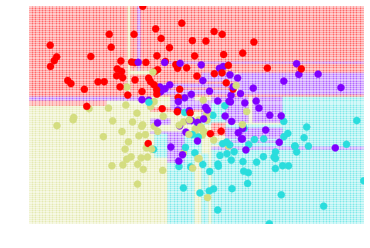

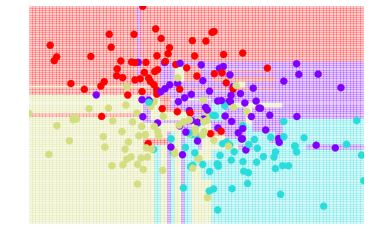

In [8]:
def fit_randomized_tree(random_state=0):
    X, y = make_blobs(n_samples=300, centers=4,
                      random_state=0, cluster_std=2.0)
    clf = DecisionTreeClassifier(max_depth=15)
    
    rng = np.random.RandomState(random_state)
    i = np.arange(len(y))
    rng.shuffle(i)
    visualize_tree(clf, X[i[:250]], y[i[:250]], boundaries=False,
                   xlim=(X[:, 0].min(), X[:, 0].max()),
                   ylim=(X[:, 1].min(), X[:, 1].max()))
    
from IPython.html.widgets import interact
interact(fit_randomized_tree, random_state=[0, 100]);

See how the details of the model change as a function of the sample, while the larger characteristics remain the same!
The random forest classifier will do something similar to this, but use a combined version of all these trees to arrive at a final answer:

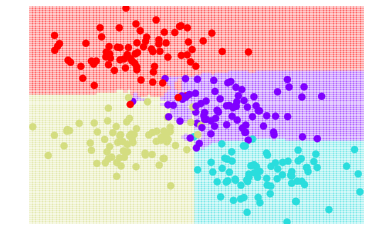

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_tree(clf, X, y, boundaries=False);

By averaging over 100 randomly perturbed models, we end up with an overall model which is a much better fit to our data!

*(Note: above we randomized the model through sub-sampling... Random Forests use more sophisticated means of randomization, which you can read about in, e.g. the [scikit-learn documentation](http://scikit-learn.org/stable/modules/ensemble.html#forest)*)

## Quick Example: Moving to Regression

Above we were considering random forests within the context of classification.
Random forests can also be made to work in the case of regression (that is, continuous rather than categorical variables). The estimator to use for this is ``sklearn.ensemble.RandomForestRegressor``.

Let's quickly demonstrate how this can be used:

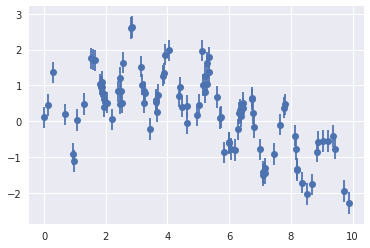

In [10]:
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

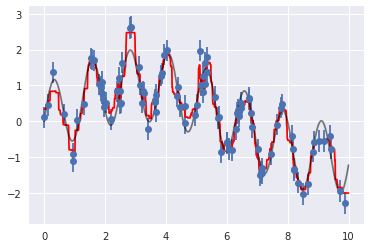

In [11]:
xfit = np.linspace(0, 10, 1000)
yfit = RandomForestRegressor(100).fit(x[:, None], y).predict(xfit[:, None])
ytrue = model(xfit, 0)

plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

As you can see, the non-parametric random forest model is flexible enough to fit the multi-period data, without us even specifying a multi-period model!

## Example: Random Forest for Classifying Digits

We previously saw the **hand-written digits** data. Let's use that here to test the efficacy of the SVM and Random Forest classifiers.

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [13]:
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


To remind us what we're looking at, we'll visualize the first few data points:

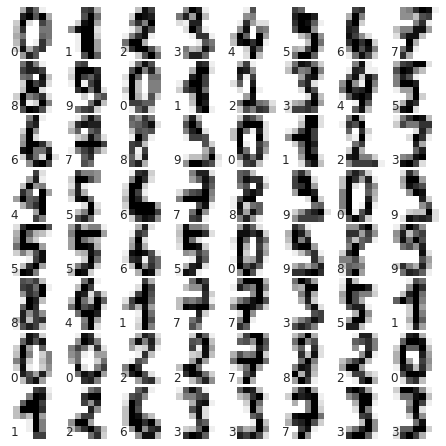

In [14]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary)
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

We can quickly classify the digits using a decision tree as follows:

In [15]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
clf = DecisionTreeClassifier(max_depth=11)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

We can check the accuracy of this classifier:

In [16]:
metrics.accuracy_score(ypred, ytest)

0.83111111111111113

and for good measure, plot the confusion matrix:

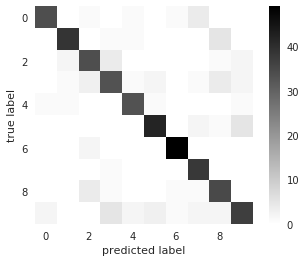

In [17]:
plt.imshow(metrics.confusion_matrix(ypred, ytest),
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");

In [18]:
print metrics.classification_report(ypred, ytest)

             precision    recall  f1-score   support

          0       0.92      0.83      0.87        41
          1       0.91      0.85      0.88        46
          2       0.77      0.79      0.78        43
          3       0.73      0.70      0.72        47
          4       0.87      0.89      0.88        37
          5       0.88      0.84      0.86        50
          6       0.94      0.96      0.95        51
          7       0.79      0.97      0.87        39
          8       0.73      0.83      0.78        42
          9       0.79      0.69      0.73        54

avg / total       0.83      0.83      0.83       450

